In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
data =pd.read_csv("/content/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#inspecting the data
print("Shape of dataset:", data.shape)
print("\nMissing values:")
print(data.isnull().sum())
print("\nDuplicates:", data.duplicated().sum())
print("\nData types:")
print(data.dtypes)
print("\nSummary statistics:")
print(data.describe())

Shape of dataset: (200, 5)

Missing values:
CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

Duplicates: 0

Data types:
CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

Summary statistics:
       CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000


In [9]:
print(data.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')


In [11]:
# Standardize the data
features = ['Age', 'Annual_Income_(k$)', 'Spending_Score']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

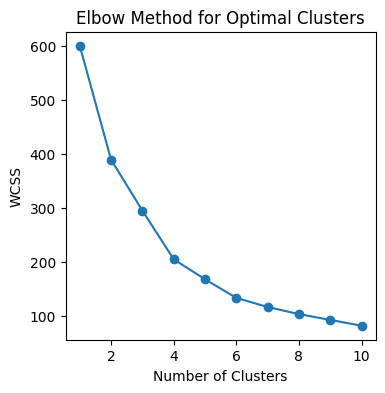

In [14]:
#Elbow method
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(4, 4))
plt.plot(k_values, wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

In [16]:
# Compute silhouette scores to validate the best k
silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores[k] = silhouette_score(X_scaled, labels)

best_k = max(silhouette_scores, key=silhouette_scores.get)
print("Optimal clusters based on silhouette score:", best_k)

Optimal clusters based on silhouette score: 6


In [17]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

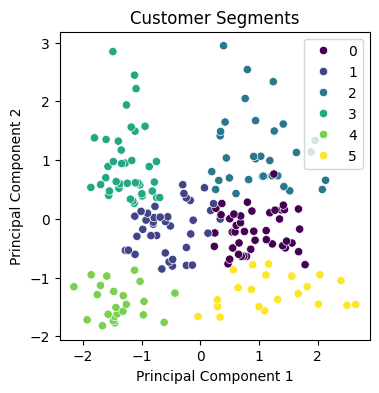

In [21]:
# Visualizing clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]
plt.figure(figsize=(4, 4))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segments")
plt.legend()
plt.show()

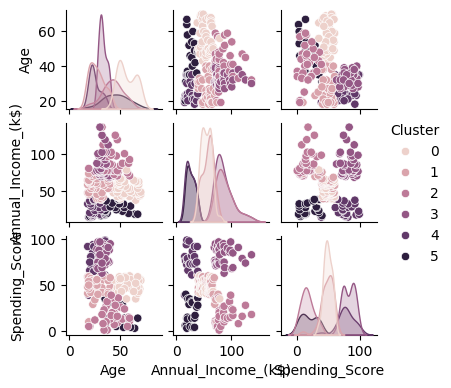

In [26]:
# pair plot
sns.pairplot(data, hue='Cluster', vars=['Age', 'Annual_Income_(k$)', 'Spending_Score'], height=1.3)  # Adjust height
plt.show()

In [25]:
# cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features)
print("Cluster centroids:\n", centroid_df)

Cluster centroids:
          Age  Annual_Income_(k$)  Spending_Score
0  56.333333           54.266667       49.066667
1  26.794872           57.102564       48.128205
2  41.939394           88.939394       16.969697
3  32.692308           86.538462       82.128205
4  25.000000           25.260870       77.608696
5  45.523810           26.285714       19.380952
